In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import datetime

In [2]:
#Uploading the CSV file
df = pd.read_csv("C:\\Users\\lavle\\Desktop\\Open food facts.csv", encoding = 'utf8')
#Remove products which do not have any product code(key field)
df  = df[df.code.isnull() == False]
df.isnull().sum()
df.head()

C:\Users\lavle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087.0,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[['code',
'created_datetime',
'last_modified_datetime',
'product_name',
'quantity',
'packaging_tags',
'brands',
'brands_tags',
'categories_en',
'origins_tags',
'manufacturing_places_tags',
'first_packaging_code_geo',
'purchase_places',
'countries_en',
'ingredients_text',
'serving_size',
'main_category_en',
'energy_100g',
'fat_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'calcium_100g',
'iron_100g',
'carbon-footprint_100g']]
df.shape

(356001, 26)

In [4]:
df.created_datetime = pd.to_datetime(df['created_datetime'])
df.head()

,code,created_datetime,last_modified_datetime,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,...,main_category_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g
0,3087.0,2016-09-17 09:17:46,2016-09-17T09:18:13Z,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530.0,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2243.0,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN
2,4559.0,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,...,NaN,1941.0,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN
3,16087.0,2017-03-09 10:35:31,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,...,NaN,2540.0,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN
4,16094.0,2017-03-09 10:34:13,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,...,NaN,1552.0,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN


In [5]:
df['year'] = df['created_datetime'].dt.year
df['month'] = df['created_datetime'].dt.month
df = df[df.year.isnull() == False]
df = df[df.month.isnull() == False]
df.year = df.year.astype(int)
df.month = df.month.astype(int)
df.head()

,code,created_datetime,last_modified_datetime,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,...,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g,year,month
0,3087.0,2016-09-17 09:17:46,2016-09-17T09:18:13Z,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,9
1,4530.0,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,...,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN,2017,3
2,4559.0,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,...,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN,2017,3
3,16087.0,2017-03-09 10:35:31,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,...,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN,2017,3
4,16094.0,2017-03-09 10:34:13,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,...,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN,2017,3


In [6]:
del df['last_modified_datetime']

In [7]:
df_carbon = df[['code',
'product_name',
'manufacturing_places_tags',
'first_packaging_code_geo',
'purchase_places',
'countries_en',
'carbon-footprint_100g',
'year',
'month']]
df_carbon.shape

(356000, 9)

In [8]:
df_carbon = df_carbon[df_carbon['carbon-footprint_100g'].isnull() == False]
df_carbon.shape

(278, 9)

In [9]:
count = df_carbon['countries_en'].isnull().value_counts()

In [10]:
count

False    277
True       1
Name: countries_en, dtype: int64

In [11]:
df_carbon = df_carbon[df_carbon['countries_en'].isnull() == False]
country_lc = df_carbon.countries_en.str.split(',', expand=True).stack()
country_llc = pd.Series.to_frame(country_lc)
country_llc.columns = ['country']
country_llc.shape

(289, 1)

In [12]:
df_carbon, df2_country = df_carbon.align(country_llc, level=0, join='outer')
df_carbon.head()

,,code,product_name,manufacturing_places_tags,first_packaging_code_geo,purchase_places,countries_en,carbon-footprint_100g,year,month,country
177440,0,2.000000e+12,Chopped Tomato Carla,"salerno,italy,campania",NaN,europe,Italy,0.0,2014,6,NaN
178093,0,2.000000e+12,confiture abricots,"provence,france",NaN,"clermont ferrand,France",France,0.0,2016,5,NaN
178528,0,2.000000e+12,KLAST RED BERRY CHEWING GUM,batook-chewing-gum-saudi-arabia,NaN,world,World,0.0,2017,2,NaN
178808,0,2.000000e+12,NaN,NaN,NaN,cd,ä¸­åŽäººæ°‘å…±å’Œå›½,12.0,2017,7,NaN
185192,0,2.126740e+12,BÃ¼nder BergkÃ¤se,suisse,NaN,NaN,Switzerland,142.7,2016,4,NaN


In [13]:
df_carbon['countries_en'] = df2_country['country']
df_carbon.head()

,,code,product_name,manufacturing_places_tags,first_packaging_code_geo,purchase_places,countries_en,carbon-footprint_100g,year,month,country
177440,0,2.000000e+12,Chopped Tomato Carla,"salerno,italy,campania",NaN,europe,Italy,0.0,2014,6,NaN
178093,0,2.000000e+12,confiture abricots,"provence,france",NaN,"clermont ferrand,France",France,0.0,2016,5,NaN
178528,0,2.000000e+12,KLAST RED BERRY CHEWING GUM,batook-chewing-gum-saudi-arabia,NaN,world,World,0.0,2017,2,NaN
178808,0,2.000000e+12,NaN,NaN,NaN,cd,ä¸­åŽäººæ°‘å…±å’Œå›½,12.0,2017,7,NaN
185192,0,2.126740e+12,BÃ¼nder BergkÃ¤se,suisse,NaN,NaN,Switzerland,142.7,2016,4,NaN


In [14]:
del df_carbon['country']

In [15]:
df_carbon.reset_index(drop=True, inplace=True)
df_carbon.head(2)

,code,product_name,manufacturing_places_tags,first_packaging_code_geo,purchase_places,countries_en,carbon-footprint_100g,year,month
0,2.000000e+12,Chopped Tomato Carla,"salerno,italy,campania",NaN,europe,Italy,0.0,2014,6
1,2.000000e+12,confiture abricots,"provence,france",NaN,"clermont ferrand,France",France,0.0,2016,5


In [16]:
df_carbon.shape

(289, 9)

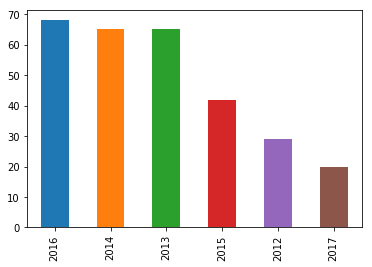

In [17]:
df_carbon['year'].value_counts().plot(kind='bar')
plt.show()

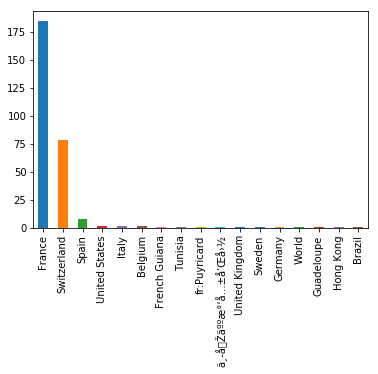

In [18]:
df_carbon['countries_en'].value_counts().plot(kind='bar')
plt.show()

In [22]:
df_carbon.sort_values(by='year', inplace=True)

In [23]:
use_date = df_carbon.groupby(['year'])['year'].count()
use_date

year
2012    29
2013    65
2014    65
2015    42
2016    68
2017    20
Name: year, dtype: int64

In [25]:
import plotly
plotly.__version__

'2.2.3'

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

In [27]:
df_carbon

,code,product_name,manufacturing_places_tags,first_packaging_code_geo,purchase_places,countries_en,carbon-footprint_100g,year,month
228,7.610200e+12,Yogourt fraise BIO,estavayer-lait-sa-laitiers-route-de-payerne-2-...,NaN,"ZÃ¼rich,suisse",Switzerland,180.9,2012,5
145,3.700210e+12,Sucre pure canne,belgique,NaN,NaN,France,73.0,2012,4
143,3.700210e+12,Riz thaÃ¯,NaN,NaN,"Noyelles-Godault,France",France,388.0,2012,6
142,3.700210e+12,Chocolat Blanc Nougatine Amande,suisse,NaN,"Paris,BrÃ©tigny-sur-Orge",France,251.0,2012,6
133,3.560070e+12,Sirop de Citron,NaN,"49.266667,-0.7",France,France,100.0,2012,6
74,3.222470e+12,Riz naturellement parfumÃ© ThaÃ¯,NaN,NaN,NaN,France,585.0,2012,6
229,7.610200e+12,Yogourt Chocolat ferme M-Classic,estavayer-lait-sa-laitiers-route-de-payerne-2-...,NaN,Suisse,Switzerland,267.4,2012,11
48,3.222470e+12,CrÃ¨me aux oeufs saveur vanille cuit et dorÃ©e...,NaN,"46.133333,-1.1","Eure-et-Loir,France",France,405.0,2012,9
52,3.222470e+12,Val d'Automne (28 % MG),union-laitiere-vitelloise-ulv-fromagerie-de-l-...,"48.216667,5.833333","Clichy,France",France,1065.0,2012,11
98,3.222470e+12,Jambon de Bayonne,NaN,NaN,NaN,France,1285.0,2012,10


In [28]:
sum_car = df_carbon.groupby(['year'])['carbon-footprint_100g'].sum()
sum_car

year
2012    12570.30
2013    23724.65
2014    30539.10
2015    11156.65
2016    16987.90
2017     3769.10
Name: carbon-footprint_100g, dtype: float64

In [29]:
sum_car = sum_car.to_frame(name='total carbon').reset_index()

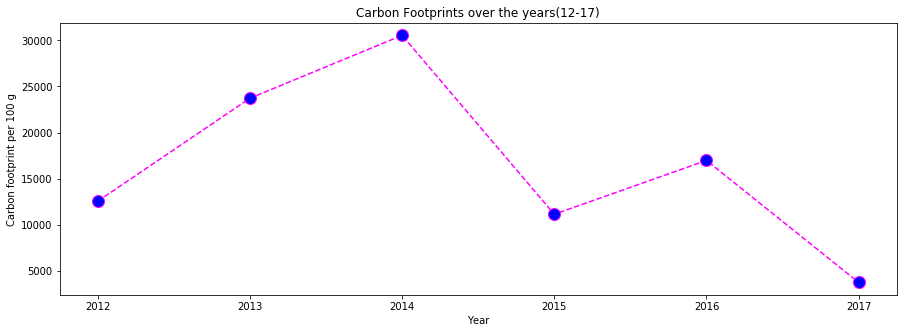

In [30]:
# Figure 
plt.figure(figsize=(15, 5))
plt.plot(df_carbon.year.unique(), sum_car['total carbon'], color ='magenta', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)
plt.ylabel('Carbon footprint per 100 g')
plt.xlabel('Year')
plt.title('Carbon Footprints over the years(12-17)')
plt.show()

sum_car.head()

In [31]:
plotly.tools.set_credentials_file(username='lavleenbhat', api_key='DjL2QH5lWPgTggH4eNRa')

In [32]:
trace = go.Scatter(x = df_carbon['year'], y = df_carbon['carbon-footprint_100g'], mode = 'markers', marker= dict(size= 14, color='red',opacity= 0.3), name = 'Carbon(each product)')
data = [trace]
layout = go.Layout(title = 'Carbon Footprint from year 2012 to 2017(For each product)',
             xaxis = dict(title='Year'),
             yaxis = dict(title='Carbon footprint for each product per 100 g'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='carbon-footprint')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lavleenbhat/0 or inside your plot.ly account where it is named 'carbon-footprint'
